IN THIS SECTION WE WILL TRY TO EXPLORE RELATIONSHIPS BETWEEN DIFFERENT VARIABLES, WILL TRY TO FIND THE OUTLIERS ETC.

In [2]:
import pandas as pd
df=pd.read_csv('cleansed_merc.csv')

In [3]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,30.1,4.0
...,...,...,...,...,...,...,...,...
12855,C Class,2020,35999,Automatic,500,Diesel,55.4,2.0
12856,B Class,2020,24699,Automatic,2500,Diesel,55.4,2.0
12857,GLC Class,2019,30999,Automatic,11612,Diesel,41.5,2.1
12858,CLS Class,2019,37990,Automatic,2426,Diesel,45.6,2.0


CHECKING THE DISTRIBUTION OF DATA

HERE WE CAN SEE THAT THE "OTHER" CATEGORIES IN TRANSMISSON AND FUELTYPE IS LESS THAN 1% SO WE CAN DELETE IT

In [4]:
df['transmission'].value_counts()

Semi-Auto    6641
Automatic    4797
Manual       1420
Other           2
Name: transmission, dtype: int64

In [5]:
df=df[df['transmission']!='Other']

In [6]:
df['fuelType'].value_counts()

Diesel    9033
Petrol    3649
Hybrid     170
Other        6
Name: fuelType, dtype: int64

In [7]:
df=df[df['fuelType']!='Other']

In [8]:
df.shape

(12852, 8)

BUT IN FUELTYPE THE IMBALANCE IS HUGE WHICH WILL CREATE BIAS IN THE MODEL SO NEED TO TREAT THAT

In [9]:
from sklearn.utils import resample
df_diesel = df[df['fuelType'] == 'Diesel']
df_petrol = df[df['fuelType'] == 'Petrol']
df_hybrid = df[df['fuelType'] == 'Hybrid']
df_hybrid_upsampled = resample(df_hybrid, replace=True, n_samples=2500, random_state=42)
df = pd.concat([df_diesel, df_petrol, df_hybrid_upsampled])

# Shuffle the dataset to randomize the order of samples
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
df.shape

(15182, 8)

In [11]:
df['fuelType'].value_counts()

Diesel    9033
Petrol    3649
Hybrid    2500
Name: fuelType, dtype: int64

In [12]:
df['year'].value_counts()

2019    4852
2017    2934
2016    2836
2018    1476
2015    1344
2020     657
2014     511
2013     318
2012      57
2011      38
2010      38
2007      22
2009      17
2008      16
2004      13
2001      10
2002       9
2005       9
2006       8
2003       7
1998       4
2000       3
1999       1
1997       1
1970       1
Name: year, dtype: int64

WE WILL DELETE YEARS 1999,1970 AND 1997

In [13]:
df['year']=df['year'].astype(str)

In [14]:
lst=['1970','1999','1997']
df=df[~df['year'].isin(lst)]

In [15]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,C Class,2016,17000,Automatic,29947,Diesel,61.4,2.1
1,C Class,2016,17799,Automatic,53613,Diesel,64.2,2.1
2,E Class,2014,14499,Semi-Auto,33702,Diesel,54.3,2.1
3,C Class,2016,19698,Automatic,25107,Hybrid,134.5,2.0
4,B Class,2017,15490,Semi-Auto,28000,Petrol,51.4,1.6
...,...,...,...,...,...,...,...,...
15177,GLE Class,2017,30599,Semi-Auto,23732,Diesel,47.9,2.1
15178,C Class,2016,14998,Semi-Auto,66732,Hybrid,78.5,2.1
15179,A Class,2017,16000,Semi-Auto,32000,Diesel,74.3,1.5
15180,A Class,2014,10990,Semi-Auto,49799,Diesel,68.9,2.1


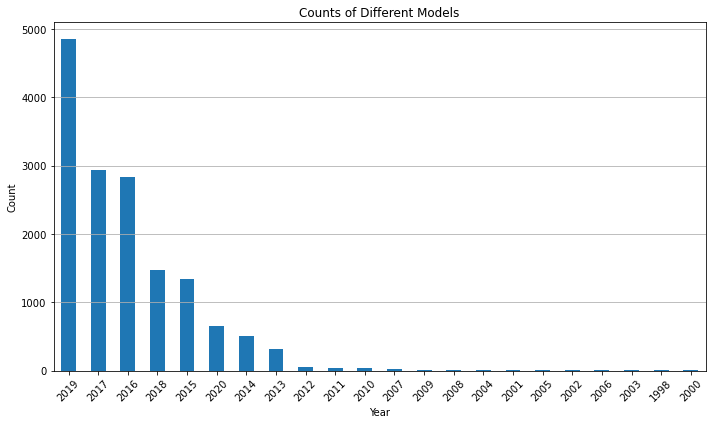

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame


# Count the occurrences of each unique value in the "model" column
model_counts = df['year'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
model_counts.plot(kind='bar')
plt.title('Counts of Different Models')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [17]:
df['model'].unique()

array([' C Class', ' E Class', ' B Class', ' GLA Class', ' A Class',
       ' GLC Class', ' CLS Class', ' CL Class', ' GLE Class', ' SL CLASS',
       ' S Class', ' GL Class', ' GLS Class', ' M Class', ' V Class',
       ' CLA Class', ' CLC Class', ' X-CLASS', ' SLK', ' GLB Class',
       ' CLK', ' G Class', '200', '180', ' R Class', '230', '220'],
      dtype=object)

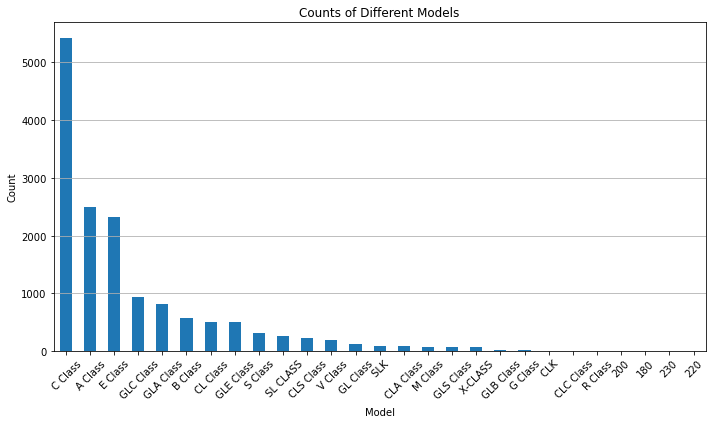

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset into a Pandas DataFrame


# Count the occurrences of each unique value in the "model" column
model_counts = df['model'].value_counts()

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
model_counts.plot(kind='bar')
plt.title('Counts of Different Models')
plt.xlabel('Model')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines along the y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [19]:
model_counts = df['model'].value_counts()

In [20]:
model_counts

 C Class      5421
 A Class      2505
 E Class      2324
 GLC Class     935
 GLA Class     826
 B Class       569
 CL Class      508
 GLE Class     505
 S Class       313
 SL CLASS      258
 CLS Class     237
 V Class       203
 GL Class      121
 SLK            94
 CLA Class      86
 M Class        78
 GLS Class      74
 X-CLASS        73
 GLB Class      18
 G Class        15
 CLK             7
 CLC Class       3
 R Class         2
200              1
180              1
230              1
220              1
Name: model, dtype: int64

WE CAN SEE THAT MODEL WITH LESS THAN 10 COUNT WILL NOT PROVIDE ANY SIGNIFICANT IMPACT TO THE MODEL SO WE CAN JUST GROUP IT AND NAME IT AS "OTHER"

In [21]:
models_to_replace = model_counts[model_counts < 10].index

# Replace values in the "model" column with count less than 10 with "Other"
df['model'] = df['model'].replace(models_to_replace, 'Other')


In [22]:
df['model'].value_counts()

 C Class      5421
 A Class      2505
 E Class      2324
 GLC Class     935
 GLA Class     826
 B Class       569
 CL Class      508
 GLE Class     505
 S Class       313
 SL CLASS      258
 CLS Class     237
 V Class       203
 GL Class      121
 SLK            94
 CLA Class      86
 M Class        78
 GLS Class      74
 X-CLASS        73
 GLB Class      18
Other           16
 G Class        15
Name: model, dtype: int64

In [23]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,C Class,2016,17000,Automatic,29947,Diesel,61.4,2.1
1,C Class,2016,17799,Automatic,53613,Diesel,64.2,2.1
2,E Class,2014,14499,Semi-Auto,33702,Diesel,54.3,2.1
3,C Class,2016,19698,Automatic,25107,Hybrid,134.5,2.0
4,B Class,2017,15490,Semi-Auto,28000,Petrol,51.4,1.6
...,...,...,...,...,...,...,...,...
15177,GLE Class,2017,30599,Semi-Auto,23732,Diesel,47.9,2.1
15178,C Class,2016,14998,Semi-Auto,66732,Hybrid,78.5,2.1
15179,A Class,2017,16000,Semi-Auto,32000,Diesel,74.3,1.5
15180,A Class,2014,10990,Semi-Auto,49799,Diesel,68.9,2.1


FIND OUT RELATIONSHIPS BETWEEN MY INDEPENDENT VARIABLES AND MY DEPENDNT VARIABLES

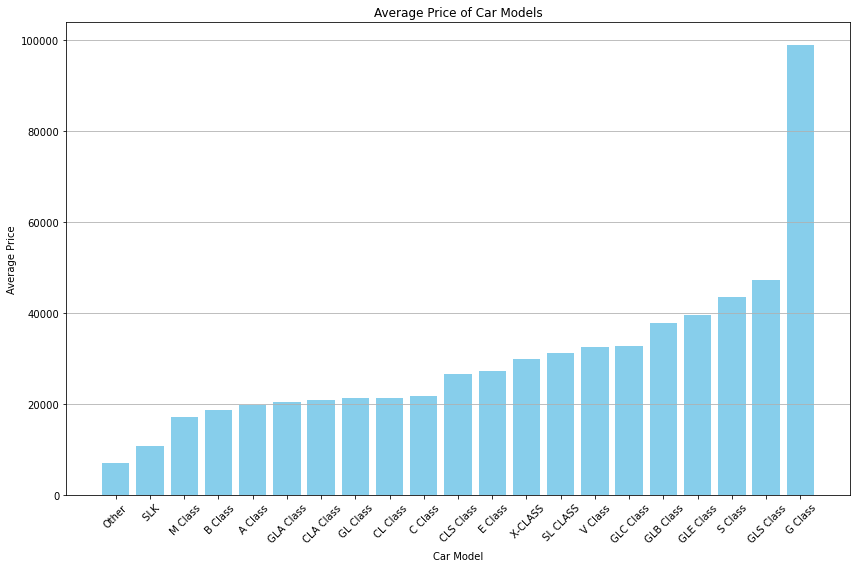

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
average_price_per_model = df.groupby('model')['price'].mean().reset_index()

# Sort the dataframe by average price
average_price_per_model = average_price_per_model.sort_values(by='price')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(average_price_per_model['model'], average_price_per_model['price'], color='skyblue')
plt.xlabel('Car Model')
plt.ylabel('Average Price')
plt.title('Average Price of Car Models')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [25]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,C Class,2016,17000,Automatic,29947,Diesel,61.4,2.1
1,C Class,2016,17799,Automatic,53613,Diesel,64.2,2.1
2,E Class,2014,14499,Semi-Auto,33702,Diesel,54.3,2.1
3,C Class,2016,19698,Automatic,25107,Hybrid,134.5,2.0
4,B Class,2017,15490,Semi-Auto,28000,Petrol,51.4,1.6
...,...,...,...,...,...,...,...,...
15177,GLE Class,2017,30599,Semi-Auto,23732,Diesel,47.9,2.1
15178,C Class,2016,14998,Semi-Auto,66732,Hybrid,78.5,2.1
15179,A Class,2017,16000,Semi-Auto,32000,Diesel,74.3,1.5
15180,A Class,2014,10990,Semi-Auto,49799,Diesel,68.9,2.1


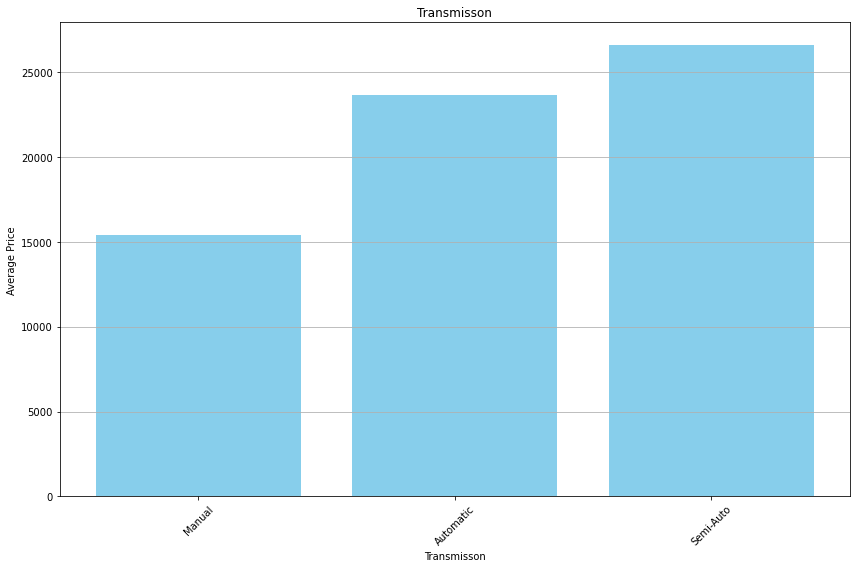

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
average_price_per_model = df.groupby('transmission')['price'].mean().reset_index()

# Sort the dataframe by average price
average_price_per_model = average_price_per_model.sort_values(by='price')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(average_price_per_model['transmission'], average_price_per_model['price'], color='skyblue')
plt.xlabel('Transmisson')
plt.ylabel('Average Price')
plt.title('Transmisson')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

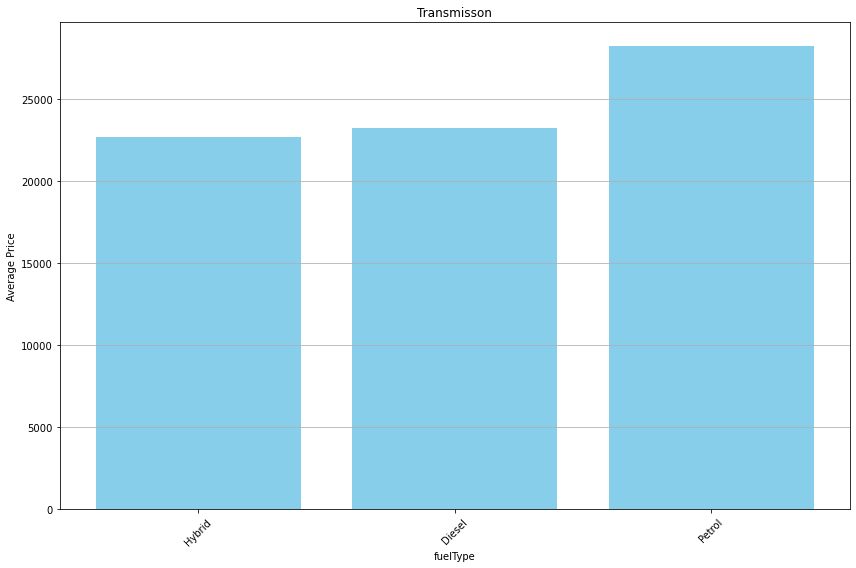

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
average_price_per_model = df.groupby('fuelType')['price'].mean().reset_index()

# Sort the dataframe by average price
average_price_per_model = average_price_per_model.sort_values(by='price')

# Plot
plt.figure(figsize=(12, 8))
plt.bar(average_price_per_model['fuelType'], average_price_per_model['price'], color='skyblue')
plt.xlabel('fuelType')
plt.ylabel('Average Price')
plt.title('Transmisson')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [28]:
df

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,C Class,2016,17000,Automatic,29947,Diesel,61.4,2.1
1,C Class,2016,17799,Automatic,53613,Diesel,64.2,2.1
2,E Class,2014,14499,Semi-Auto,33702,Diesel,54.3,2.1
3,C Class,2016,19698,Automatic,25107,Hybrid,134.5,2.0
4,B Class,2017,15490,Semi-Auto,28000,Petrol,51.4,1.6
...,...,...,...,...,...,...,...,...
15177,GLE Class,2017,30599,Semi-Auto,23732,Diesel,47.9,2.1
15178,C Class,2016,14998,Semi-Auto,66732,Hybrid,78.5,2.1
15179,A Class,2017,16000,Semi-Auto,32000,Diesel,74.3,1.5
15180,A Class,2014,10990,Semi-Auto,49799,Diesel,68.9,2.1


In [29]:
df.to_csv('data_model_merc.csv',index=False)